In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, pydotplus
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv(r'G:\My Drive\Creative_Meta_Analysis\Data\Clean_Data.csv',
                 encoding='latin1', 
                 na_values='', 
                 keep_default_na=False)

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = df[
    (df['Platform'] == 'Desktop') & 
    (df['Region'] == 'NA') & 
    (df['Format'] == 'Video') & 
    (df['Set_Cell'] != 0) &
    (df['Video_Length'] == ':06')
]

In [33]:
from sklearn.model_selection import train_test_split

new_df = df[[
    'Purchase_Intent_Top2Box',
    'Enjoyment',
    'Involving',
    'Interesting',
    'Unique',
    'Understanding',
    'Relevance',
    'Branding',
    'Brand_Appeal',
    'Distinctiveness'
]].dropna()

In [34]:
def create_dfs(data, response_var, vid_length=None):
    if vid_length:
        data = data[data['Video_Length'] == vid_length]
        
    X = data.drop([response_var], axis=1)
    y = data[response_var]

    return train_test_split(X, y, test_size=0.25, random_state=42)    

### Aided Awareness Random Forests

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [10, 25, 50, 100, 150],
    'max_depth': [2, 3, 4],
    'max_features': ['auto'] 
}]

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, params)

In [36]:
X_train, X_test, y_train, y_test = create_dfs(new_df, 'Purchase_Intent_Top2Box')
rf_fit_06 = rf_grid.fit(X_train, y_train)
pd.DataFrame(rf_fit_06.cv_results_)

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_tra

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.020054,0.002340,0.719980,0.727562,2,auto,10,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",15,0.726339,0.734043,0.724138,0.727073,0.709464,0.721570,0.003568,0.000474,0.007490,0.005104
1,0.028743,0.005209,0.732697,0.733920,2,auto,25,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",6,0.729274,0.739178,0.737344,0.728907,0.731475,0.733676,0.003551,0.007366,0.003406,0.004197
2,0.062506,0.010418,0.732697,0.737222,2,auto,50,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",6,0.728540,0.738811,0.738078,0.736244,0.731475,0.736610,0.000001,0.007366,0.003989,0.001134
3,0.150740,0.019982,0.733676,0.735510,2,auto,100,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",2,0.728540,0.734409,0.738811,0.733309,0.733676,0.738811,0.024836,0.008061,0.004193,0.002377
4,0.247170,0.027729,0.732942,0.735510,2,auto,150,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",5,0.725605,0.734409,0.739545,0.735510,0.733676,0.736610,0.017721,0.003320,0.005715,0.000899
5,0.025067,0.005686,0.732453,0.734776,3,auto,10,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",9,0.735877,0.738445,0.732208,0.727073,0.729274,0.738811,0.004331,0.000944,0.002701,0.005449
6,0.044401,0.001003,0.730741,0.737833,3,auto,25,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",13,0.722671,0.736977,0.733676,0.735143,0.735877,0.741379,0.001892,0.001418,0.005777,0.002617
7,0.077477,0.011559,0.732453,0.737955,3,auto,50,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",9,0.727806,0.739178,0.735143,0.738445,0.734409,0.736244,0.025019,0.003145,0.003299,0.001247
8,0.184793,0.019931,0.731964,0.738200,3,auto,100,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",11,0.728540,0.738445,0.736610,0.736977,0.730741,0.739178,0.018062,0.002606,0.003406,0.000915
9,0.241407,0.034392,0.733676,0.738934,3,auto,150,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",2,0.730007,0.738811,0.739545,0.736977,0.731475,0.741012,0.026747,0.007407,0.004193,0.001650


In [18]:
X_train, X_test, y_train, y_test = create_dfs(new_df, 'Aided_Awareness', vid_length=':15')
rf_fit_15 = rf_grid.fit(X_train, y_train)
pd.DataFrame(rf_fit_15.cv_results_)

KeyError: 'Video_Length'

In [46]:
X_train, X_test, y_train, y_test = create_dfs(new_df, 'Aided_Awareness', vid_length=':30')
rf_fit_30 = rf_grid.fit(X_train, y_train)
pd.DataFrame(rf_fit_30.cv_results_)

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_tra

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.015739,0.006212,0.751125,0.751125,2,auto,10,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.004322,0.006788,0.000123,0.000061
1,0.034245,0.005209,0.751125,0.751125,2,auto,25,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.004253,0.007366,0.000123,0.000061
2,0.078152,0.000000,0.751125,0.751125,2,auto,50,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.000018,0.000000,0.000123,0.000061
3,0.144964,0.017113,0.751125,0.751125,2,auto,100,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.018259,0.002103,0.000123,0.000061
4,0.242951,0.026044,0.751125,0.751125,2,auto,150,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.059673,0.007367,0.000123,0.000061
5,0.019159,0.000704,0.751125,0.751125,3,auto,10,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.004976,0.000996,0.000123,0.000061
6,0.041661,0.005209,0.751125,0.751125,3,auto,25,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.007337,0.007366,0.000123,0.000061
7,0.067715,0.019006,0.751125,0.751125,3,auto,50,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.007369,0.004780,0.000123,0.000061
8,0.145618,0.013611,0.751125,0.751125,3,auto,100,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.007604,0.002850,0.000123,0.000061
9,0.208891,0.032664,0.751125,0.751125,3,auto,150,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",1,0.751039,0.751169,0.751039,0.751169,0.751299,0.751039,0.004071,0.001974,0.000123,0.000061


In [37]:
x = rf_fit_06.best_estimator_.feature_importances_ 

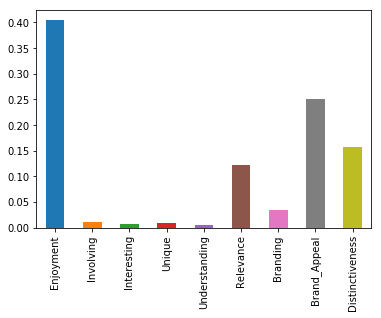

In [38]:
pd.Series(x, index=X_train.columns).plot(kind='bar')